In [1]:
# for data
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

#for the image
from IPython.display import Image

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data Exploration
1. Access the Data 
2. Get Information about the variables
3. Showing what type of variable we have
4. Univariate analysis
    - Continuous variable
    - Categorical variable
5. Bi-variate analysis 
    - Use of anova (target ~ Features)
    - continuous vs. categorical 
    - categorical vs categorical 

In [2]:
#access the data
data = pd.read_csv('PurchaseBehaviour.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#getting the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Univariate analysis

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


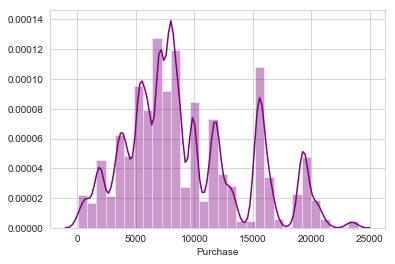

In [6]:
#continues data
sns.distplot(data['Purchase'],bins=30,color='purple')

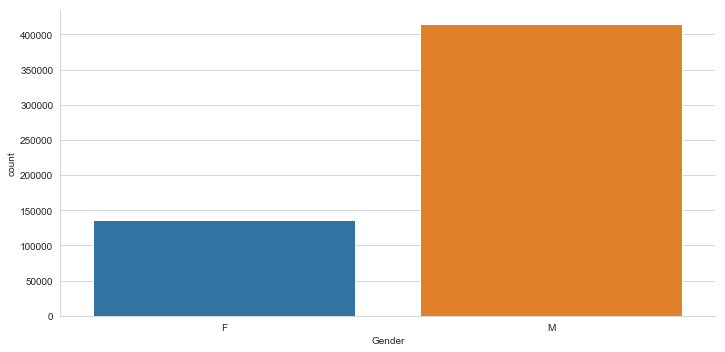

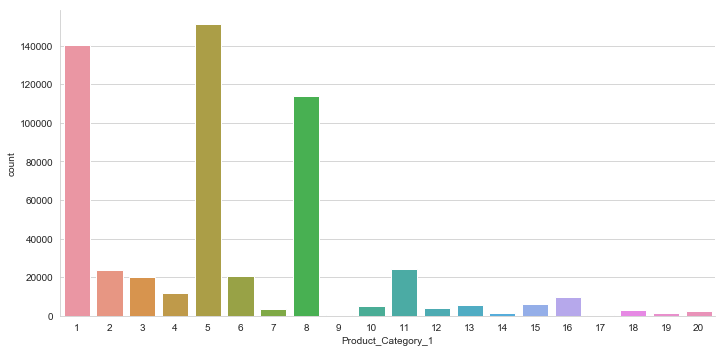

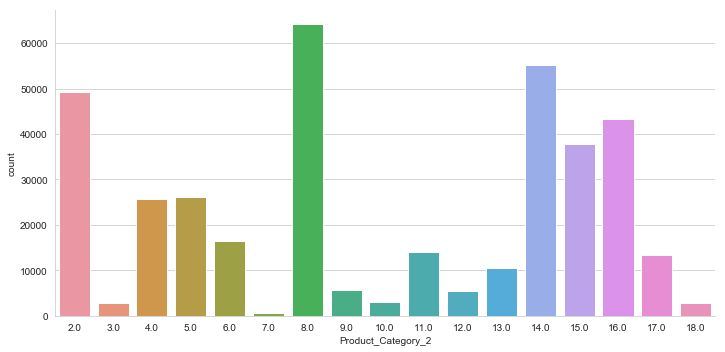

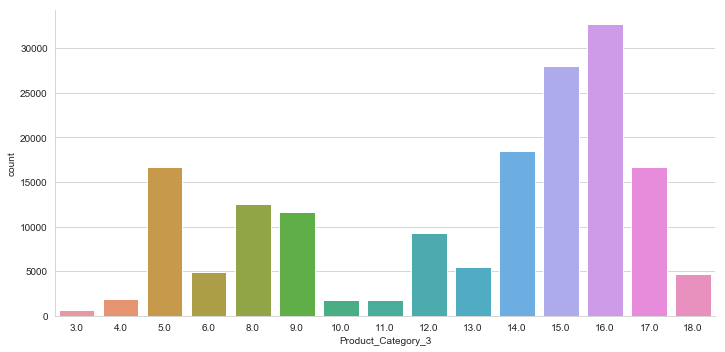

In [7]:
#Categorical variable
sns.catplot('Gender', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_1', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_2', data = data, kind = 'count', aspect = 2)
sns.catplot('Product_Category_3', data = data, kind = 'count', aspect = 2)

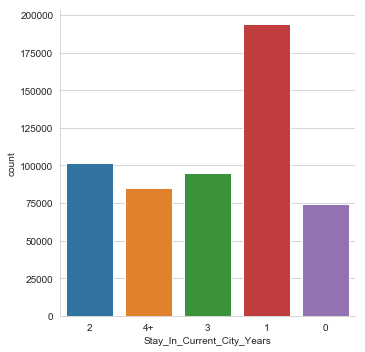

In [8]:
sns.catplot(x ='Stay_In_Current_City_Years', data = data, kind = 'count' )

# Bi-variate Analysis

1. This chart shows the amount of purchases in every age group.

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


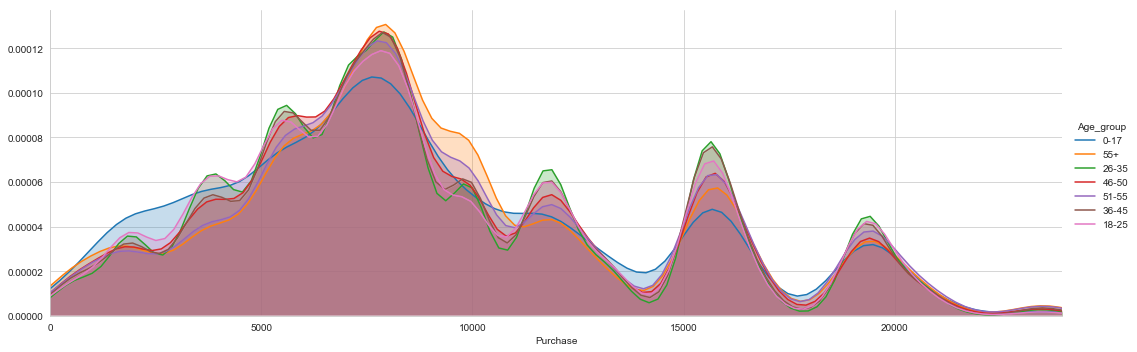

In [9]:
#Comparison between the purchase by the age group.

age_group = {'0-17': '0-17', '18-25': '18-25', '26-35':'26-35', '36-45': '36-45', '46-50': '46-50',
             '36-45': '36-45', '51-55': '51-55', '55+':'55+'}
data['Age_group'] = data['Age'].map(age_group)
fig = sns.FacetGrid(data, hue = 'Age_group', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

 
Remarks: There is a trend in the age groups. The age group 0-17 dominate the cheap prices shown in 'blue'. 

2. This chart shows the purchases in every occupation

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


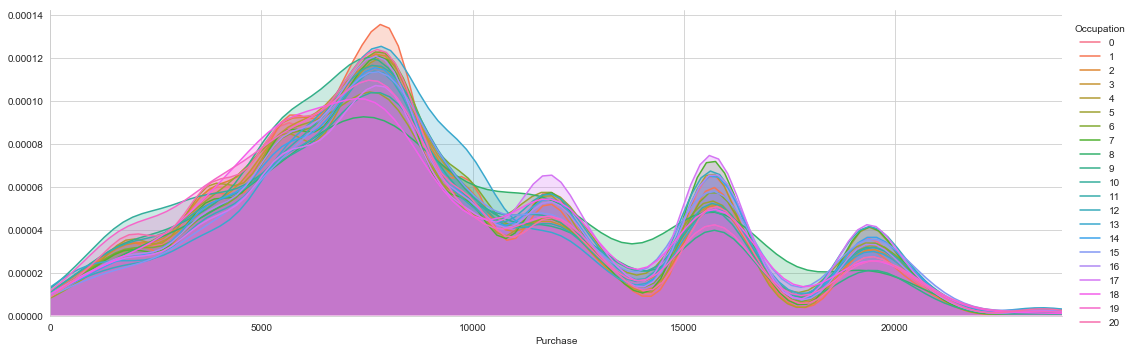

In [10]:
# Comparison between the Purchase by the occupation
fig = sns.FacetGrid(data, hue = 'Occupation', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [11]:
# getting the mean of all the Purchases from the different occupation category
purchase_per_occupation = data['Purchase'].groupby(data['Occupation'])
purchase_per_occupation.mean()

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

3. This chart shows the purchases in every stay in current years

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


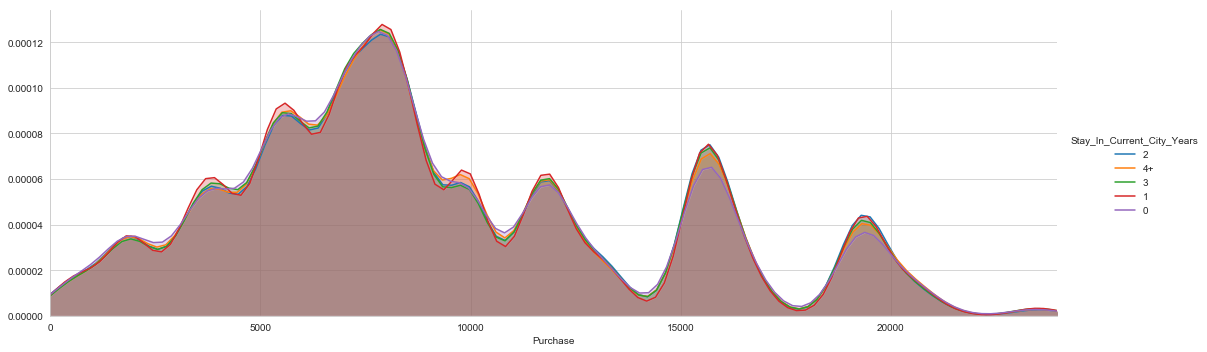

In [13]:
#Comparison between the 'purhase' and 'the stay in current years'
fig = sns.FacetGrid(data, hue = 'Stay_In_Current_City_Years', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [14]:
#numerical representation of the above graph showing their mean
purchase_per_stay = data['Purchase'].groupby(data['Stay_In_Current_City_Years'])
purchase_per_stay.mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

4. This chart Shows the purchases in every city category

C:\Users\rezan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

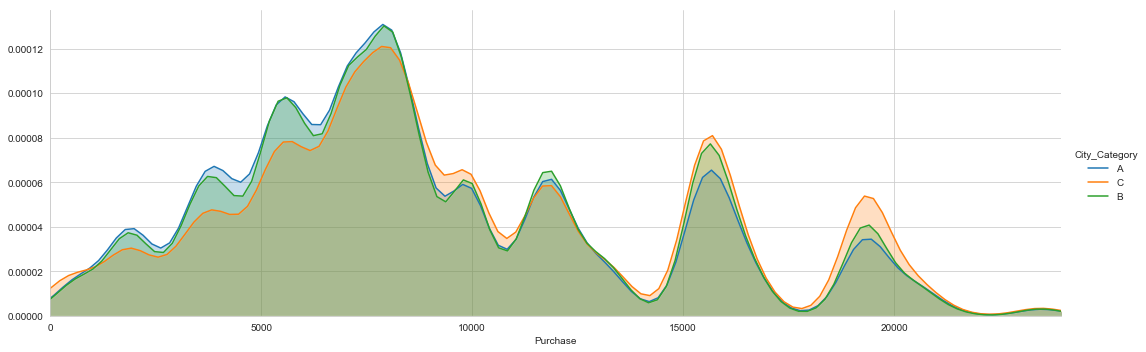

In [15]:
#Comparison between the 'purhase' and 'city category'
fig = sns.FacetGrid(data, hue = 'City_Category', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = data['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

city_cat = data['Purchase'].groupby(data['City_Category'])
city_cat.mean()

This chart shows the what products inside product category 1 has the most number of purchase.

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,Sum
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1462,623,1046,2402,62,382,451,723,41961,177770
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,4087,900,5244,7426,516,2743,1152,1827,115547,529806


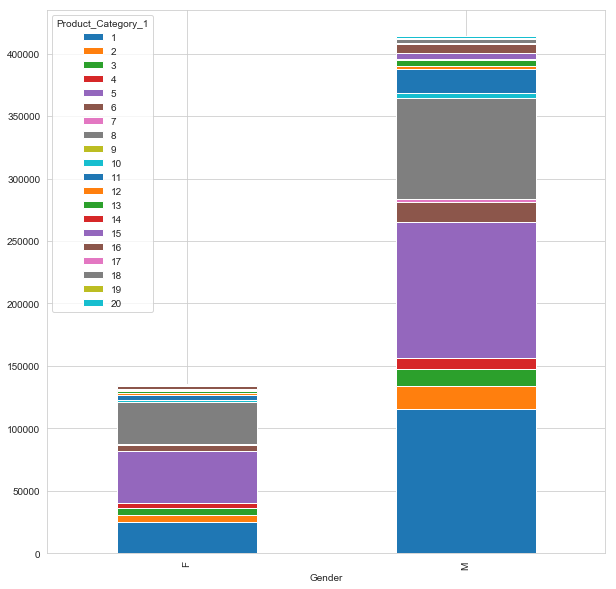

In [16]:
# Gender to product category 1
data2 = data.groupby(['Gender','Product_Category_1'])['Gender'].count().unstack('Product_Category_1').fillna(99)
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max,axis = 1)
data2['Sum'] = data2.apply(sum, axis = 1)
data2

This chart shows the what products inside product category 2 has the most number of purchase.

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,,,
F,9199,617,7619,6155,3291,137,16529,1497,736,2754,1744,2669,19693,6432,9496,2484,478,19693
M,40018,2267,18058,20080,13175,489,47559,4196,2307,11380,3784,7862,35415,31423,33759,10836,2292,47559


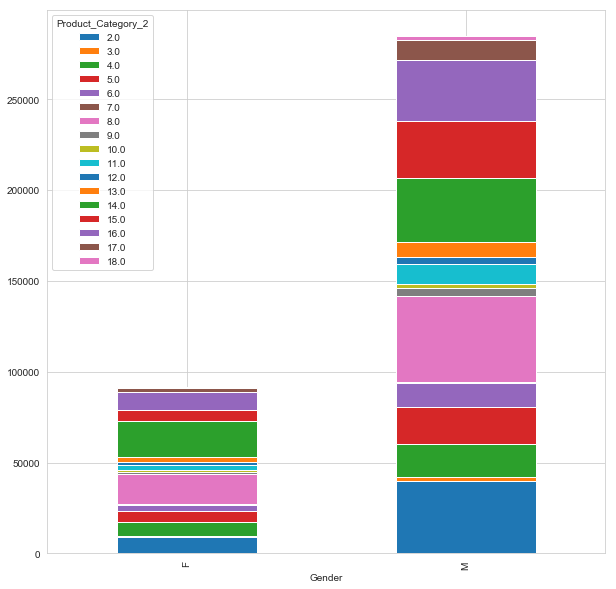

In [17]:
# Gender to Produc_category 2
data2 = data.groupby(['Gender','Product_Category_2'])['Gender'].count().unstack('Product_Category_2').fillna(99)
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2

This chart shows the what products inside product category 3 has the most number of purchase.

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,
F,95,433,4297,828,2941,2676,414,334,2722,1229,5623,4610,6774,3738,880,6774
M,518,1442,12361,4062,9621,8903,1312,1471,6524,4230,12805,23403,25862,12964,3749,25862


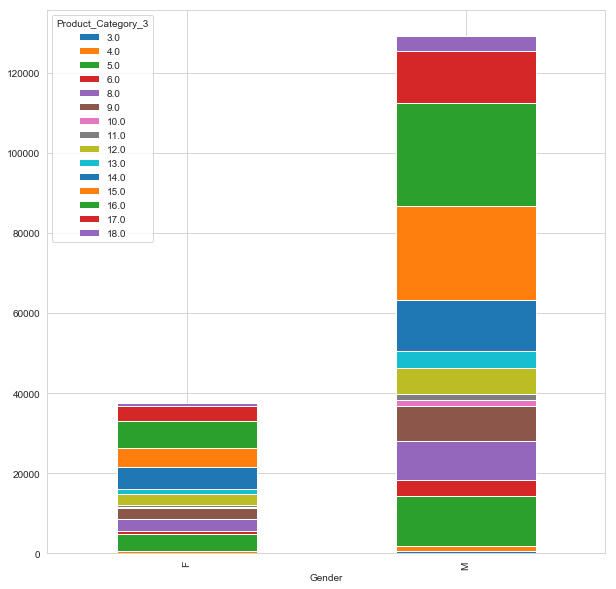

In [18]:
#Gender to Product_Category_3
data2 = data.groupby(['Gender','Product_Category_3'])['Gender'].count().unstack('Product_Category_3').fillna(99)
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2

Remarks: In Product_Category_1. Product 5 is the max for females, and Product 1, is the max for males

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,total
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,...,112,39,160,229,6,27,59,90,4330,19432
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,...,756,230,1024,1598,41,339,275,469,28522,128182
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,...,2096,564,2372,4118,127,1042,563,898,61473,281060
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,...,1250,312,1395,1955,135,702,320,506,29377,139390
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,...,551,149,602,879,95,351,149,227,11971,57672


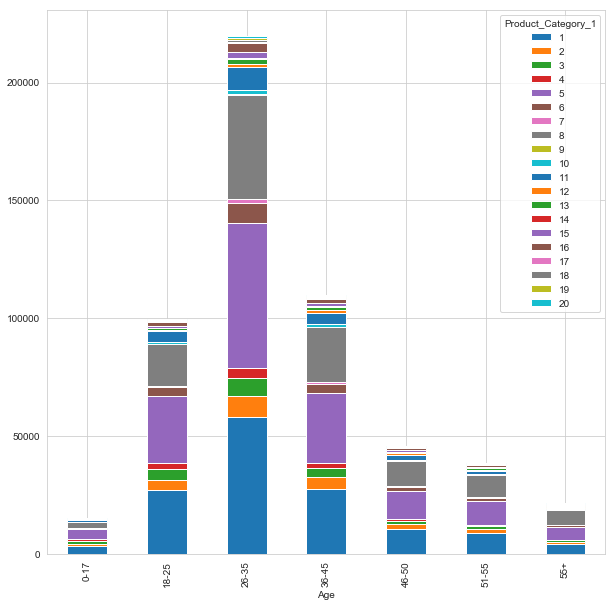

In [19]:
# Age to product category 1
data2 = data.groupby(['Age','Product_Category_1'])['Age'].count().unstack('Product_Category_1').fillna(99)
data2.plot(kind='bar', figsize=(10,10), stacked = True )
data2['Max_value'] = data2.apply(max, axis = 1)
data2['total'] = data2.apply(sum, axis = 1)
data2.head()

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,Max_value
Occupation,,,,,,,,
0,2134.0,9095.0,34204.0,13393.0,4488.0,4602.0,1722.0,34204.0
1,387.0,3820.0,19080.0,9501.0,7089.0,4410.0,3139.0,19080.0
2,144.0,4364.0,12617.0,5183.0,2124.0,1344.0,812.0,12617.0
3,99.0,1860.0,8159.0,4126.0,1599.0,1094.0,812.0,8159.0
4,113.0,48241.0,21829.0,1747.0,129.0,249.0,99.0,48241.0
5,99.0,1450.0,6082.0,3066.0,1187.0,377.0,15.0,6082.0
6,99.0,1144.0,7216.0,4822.0,2561.0,3952.0,660.0,7216.0
7,139.0,2078.0,24060.0,18762.0,6664.0,5355.0,2075.0,24060.0
8,29.0,14.0,378.0,98.0,549.0,317.0,161.0,549.0


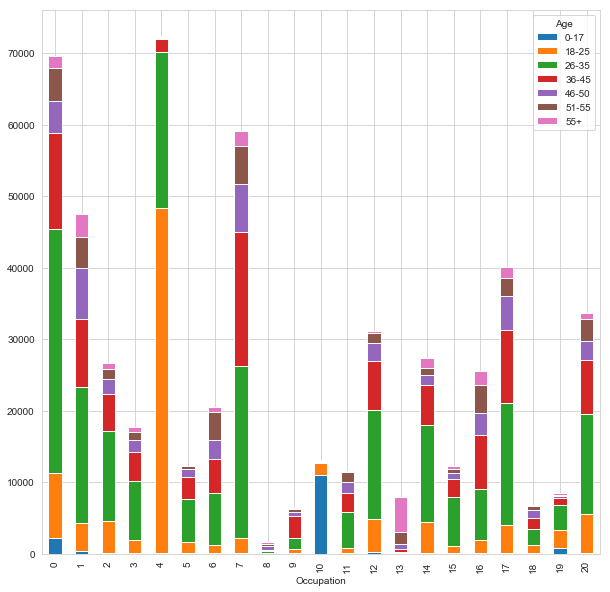

In [20]:
data3 = data.groupby(['Occupation','Age'])['Age'].count().unstack('Age').fillna(99)
data3.plot(kind='bar', figsize=(10,10), stacked = True )
data3['Max_value'] = data3.apply(max, axis = 1)
data3


In [29]:
# convert all to numerical data for anova analysis
gender = {'M': 1, 'F': 0}
data['Gender'] = data['Gender'].map(gender)
city = {'A': 1, 'C':2, 'B':3}
age_cat = {'0-17': 0, '55+':6, '26-35':2, '46-50': 4, '51-55':5, '36-45':3, '18-25':1}
data['Age'] = data['Age'].map(age_cat)
data['City_Category'] = data['City_Category'].map(city)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace({'4+':4})
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)
#making it zero for now for the anova test.
data[['Product_Category_1','Product_Category_2','Product_Category_3']] = data[['Product_Category_1','Product_Category_2','Product_Category_3']].fillna(0)

In [30]:
#categorical vs continuous
# anova for categorical vs. continuous 
data_anova_result = ols('Purchase ~ Age + City_Category + Occupation + Product_Category_1 + Product_Category_2 + Product_Category_3', data=data).fit()
data_anova_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                 1.597e+04
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:36:15   Log-Likelihood:            -5.4239e+06
No. Observations:              550068   AIC:                         1.085e+07
Df Residuals:                  550061   BIC:                         1.085e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.007e+04     25.267    398.430      0.000       1e+04    1.01e+04
Age                  119.7422      4.652     25.742      0.000     110.625     128.859
City_Category         29.2008      7.668      3.808      0.000      14.173      44.229
Occupation            10.3462      0.962     10.750      0.000       8.460      12.232
Product_Category_1  -350.4266      1.726   -203.069      0.000    -353.809    -347.044
Product_Category_2    12.7460      1.011     12.608      0.000      10.764      14.727
Product_Category_3   145.5801      1.087    133.937      0.000     143.450     147.710
==============================================================================
Omnibus:                    57537.418   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80032.256
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       3.831   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

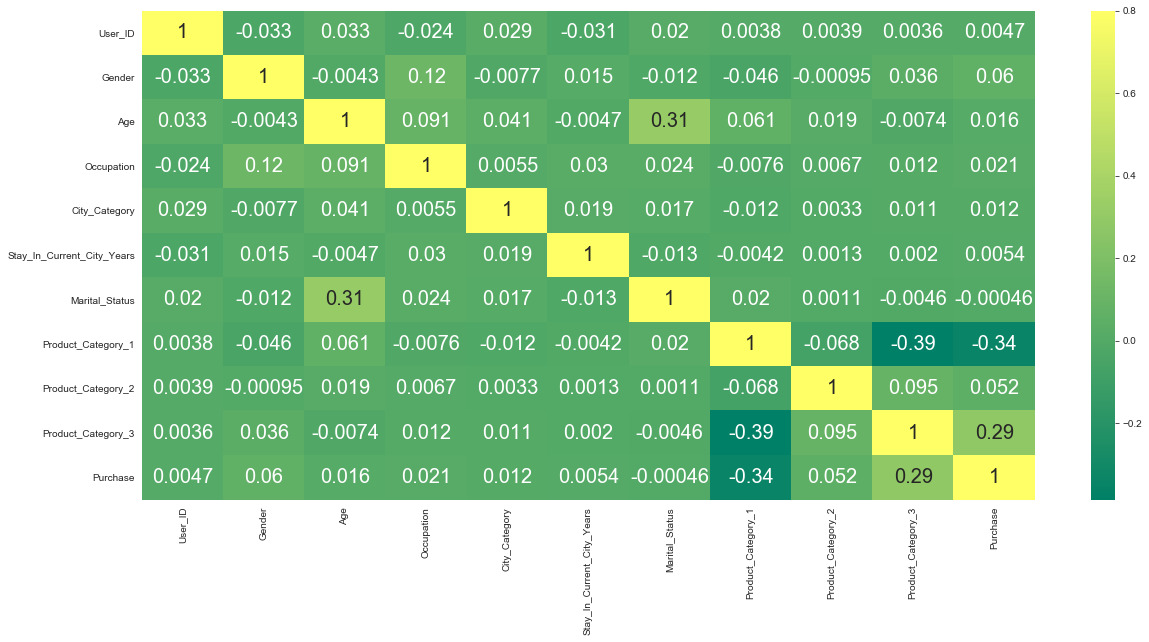

In [31]:
# getting the correlation 
corr = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True, cmap = 'summer');